# Pre-Model EDA

### Load in the data from s3

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

In [2]:
# Load in data: df
df = pd.read_csv('https://s3.amazonaws.com/clcarverloans/data/df_cleaned.csv')

### EDA

In [3]:
# Create function to convert colors: rgb_colors
def rgb_color(r,g,b):
    r = r/255.
    g = g/255.
    b = b/255.
    return(r,g,b)

In [4]:
# Create colors:
tableau_blue = rgb_color(31,119,180)
tableau_grey = rgb_color(127,127,127)

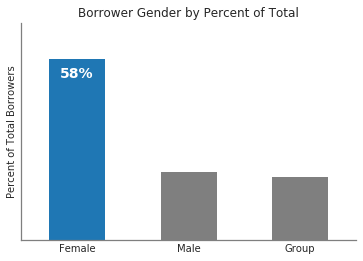

In [5]:
# Breakdown by Gender

# Group and sort:
gender_groups = df.groupby('Borrower_Genders')['Id'].count()
groups_sorted = gender_groups.sort_values(ascending=False)
female_pct = int(round((df.groupby('Borrower_Genders')['Id'].count()['female']/len(df))*100, 0))

# Create plot
ax = groups_sorted.plot(kind='bar')
for bar in ax.patches:
    bar.set_facecolor(color=rgb_color(127,127,127)) # Set all to grey
ax.patches[0].set_facecolor(rgb_color(31,119,180)) # highlight first with blue
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_color(tableau_grey)
ax.axes.get_yaxis().set_ticks([])
plt.xlabel('')
plt.margins(0.2)
plt.text(0,48000, str(female_pct)+'%', horizontalalignment='center', color='w', size=14, weight='bold')
plt.xticks(range(3), ['Female', 'Male', 'Group'], rotation='horizontal')
plt.ylabel('Percent of Total Borrowers')
plt.title('Borrower Gender by Percent of Total')
plt.savefig('../pictures/borrowers_by_gender.png', dpi=600, transparent=True, bbox_inches='tight')
plt.show()

In [6]:
default_sector = sorted(df.groupby('Sector').sum()['Delinquent']/df.groupby('Sector').count()['Delinquent'], reverse=False)
sector_list = (df.groupby('Sector').sum()['Delinquent']/df.groupby('Sector').count()['Delinquent']).index[np.argsort(default_sector)]
default_by_sector = pd.DataFrame({'Sector': sector_list, 'Default_pct': default_sector})
default_by_sector.set_index('Sector', inplace=True)

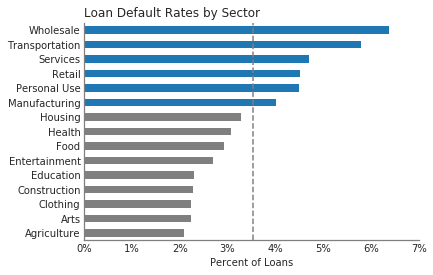

In [7]:
ax = default_by_sector.plot(kind='barh', legend=False)
plt.axvline(default_by_sector['Default_pct'].mean(), color='grey', linestyle='--')
for bar in ax.patches:
    bar.set_facecolor(color=rgb_color(127,127,127)) # Set all to grey
for bar in range(-6,0): 
    ax.patches[bar].set_facecolor(rgb_color(31,119,180)) # highlight those above average with blue
labels=[str(int(round(label*100)))+'%' for label in np.arange(0,0.08,0.01)]    
plt.title('Loan Default Rates by Sector', loc='left')
plt.ylabel('')
plt.xlabel('Percent of Loans')
plt.xticks(np.arange(0,0.08, 0.01), labels)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_color(tableau_grey)
plt.savefig('../pictures/defaults_by_sector.png', dpi=600, transparent=True, bbox_inches='tight', orientation='landscape')

In [15]:
default_by_country = pd.DataFrame(df.groupby('Country').sum()['Delinquent']/df.groupby('Country').count()['Delinquent']).sort_values('Delinquent')
best_countries = default_by_country.iloc[:5]
worst_countries = default_by_country.iloc[-5:]

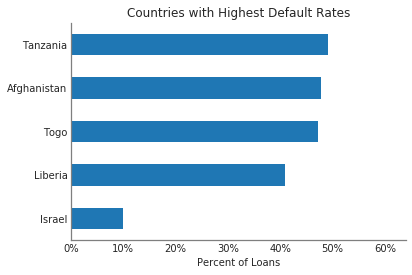

In [31]:
ax = worst_countries.plot(kind='barh', legend=False)
plt.title('Countries with Highest Default Rates', loc='center')
plt.margins(0.3)
plt.xlabel('')
plt.xlabel('Percent of Loans')
plt.ylabel('')
labels=[str(int(round(label*100)))+'%' for label in np.arange(0,0.7,0.1)]
plt.xticks(np.arange(0,0.7,0.1),labels)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_color(tableau_grey)
plt.savefig('../pictures/defaults_worst_countries.png', dpi=600, transparent=True, bbox_inches='tight', orientation='landscape')
plt.show()

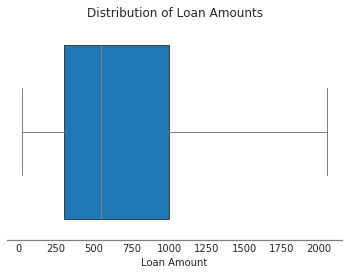

In [44]:
ax = sns.boxplot(x='Loan Amount', data=df, showfliers=False, color=tableau_blue, saturation=1, linewidth=1, whis=1.5)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_visible(False)
plt.setp(ax.lines, color=tableau_grey)
plt.title('Distribution of Loan Amounts')
plt.savefig('../pictures/distribution_loan_amounts.png', dpi=600, transparent=True, bbox_inches='tight', orientation='landscape')
plt.show()

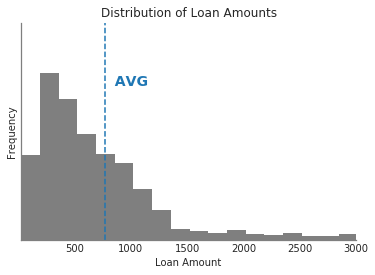

In [68]:
ax = df['Loan Amount'].plot(kind='hist', bins=60, color=tableau_grey)
plt.margins(0.3)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color(tableau_grey) 
ax.spines['left'].set_color(tableau_grey)
plt.xlabel('Loan Amount')
plt.axvline(df['Loan Amount'].mean(), color=tableau_blue, linestyle='--')
plt.title('Distribution of Loan Amounts')
plt.xlim(df['Loan Amount'].min(), 3000)
plt.text(df['Loan Amount'].mean(), 17000, '  AVG', horizontalalignment='left', color=tableau_blue, size=14, weight='bold')
ax.axes.get_yaxis().set_ticks([])
plt.savefig('../pictures/loan_amount_hist.png', dpi=600, transparent=True, bbox_inches='tight', orientation='landscape')
plt.show()